Apnea audio segments: (212, 160000) float16
Apnea. Min: -0.141 Max: 0.11774
Non-apnea audio segments: (212, 160000) float16
Non-apnea. Min: -0.152 Max: 0.1503

First 3 apnea audio segments:


(64, 313)


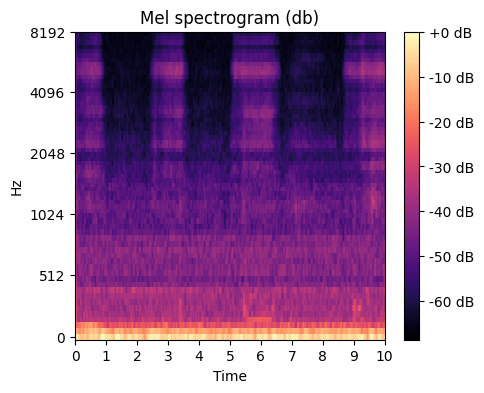

(64, 313)


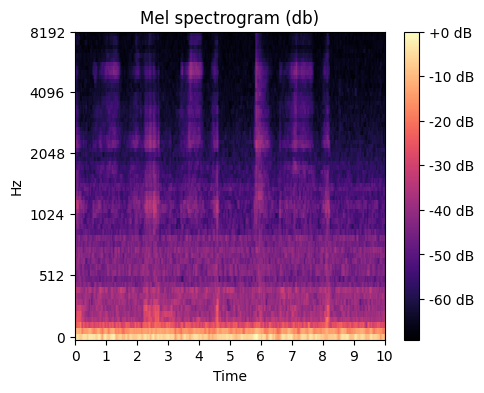

(64, 313)


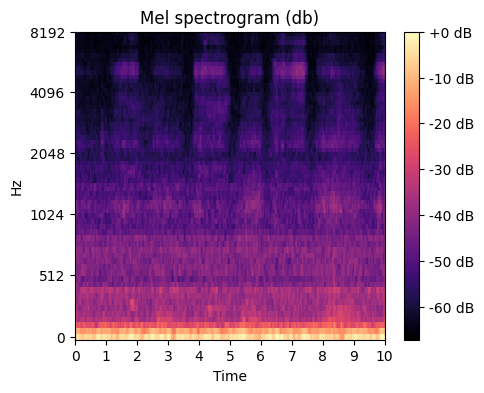


First 3 non-apnea audio segments:


(64, 313)


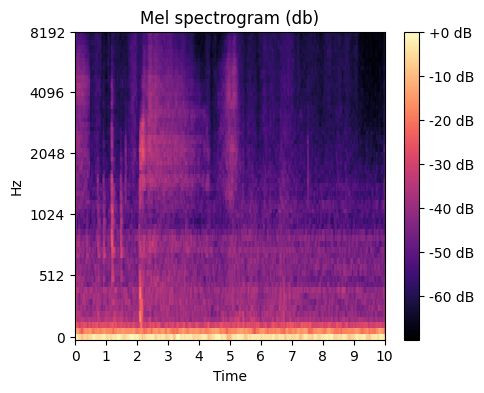

(64, 313)


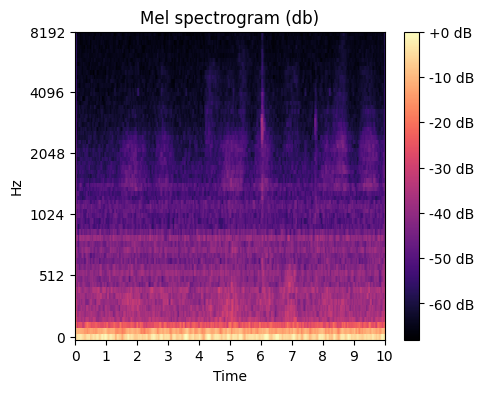

(64, 313)


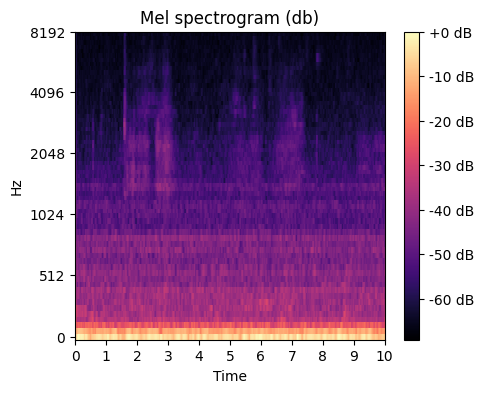

In [50]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

base_dir = "D:/apneaCleaned/PSG-AUDIO/APNEA_EDF"
patient_0_apnea = np.load(f"{base_dir}/00000995-100507/00000995-100507_ap.npy")
patient_0_non_apnea = np.load(f"{base_dir}/00000995-100507/00000995-100507_nap.npy")
sampling_rate = 16000
default_n_to_display = 3

# print apnea info in patient 1
print("Apnea audio segments:", patient_0_apnea.shape, patient_0_apnea.dtype) # 212 audio segments
print("Apnea. Min:", np.min(patient_0_apnea), "Max:", np.max(patient_0_apnea))

# print non-apnea info in patient 1
print("Non-apnea audio segments:", patient_0_non_apnea.shape, patient_0_non_apnea.dtype) # 212 audio segments
print("Non-apnea. Min:", np.min(patient_0_non_apnea), "Max:", np.max(patient_0_non_apnea))

print("\nFirst 3 apnea audio segments:")
for i in range(0, default_n_to_display):
    segment = patient_0_apnea[i]
    ipd.Audio(segment, rate=sampling_rate)
    display(ipd.Audio(segment, rate=sampling_rate))

    spectrogram = librosa.feature.melspectrogram(y=segment, sr=sampling_rate, n_mels=64) # 512 hops by default
    print(spectrogram.shape) # 64 mel freq bins and 312 small windows
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max) # needs decibels

    # plot
    plt.figure(figsize=(5, 4))
    librosa.display.specshow(spectrogram_db, sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.xticks(np.arange(0, 11, 1)) # shows every sec scale
    plt.colorbar(format='%+2.0f dB') # add db bar
    plt.title('Mel spectrogram (db)')
    plt.show()

print("\nFirst 3 non-apnea audio segments:")
for i in range(0, default_n_to_display):
    segment = patient_0_non_apnea[i]
    ipd.Audio(segment, rate=sampling_rate)
    display(ipd.Audio(segment, rate=sampling_rate))

    spectrogram = librosa.feature.melspectrogram(y=segment, sr=sampling_rate, n_mels=64) # 512 hops by default
    print(spectrogram.shape) # 64 mel freq bins and 312 small windows
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max) # needs decibels

    # plot
    plt.figure(figsize=(5, 4))
    librosa.display.specshow(spectrogram_db, sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.xticks(np.arange(0, 11, 1)) # shows every sec scale
    plt.colorbar(format='%+2.0f dB') # add db bar
    plt.title('Mel spectrogram (db)')
    plt.show()